# Fisher Discriminant Analysis

In questo laboratorio studieremo l'implementazione della Fisher Discriminant Analysis (FDA), in particolare nella sua forma generalizzata a più classi (Multiple Discriminant Analysis - MDA).

In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
#%matplotlib widget
#
#
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from FisherDA import MultipleFisherDiscriminantAnalysis as MDA

## Importazione Dataset digits

Importiamo il dataset "digits" di scikit-learn come visto nei laboratori per la PCA.

In [2]:
digits_dataset = datasets.load_digits(as_frame=True)

print(digits_dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

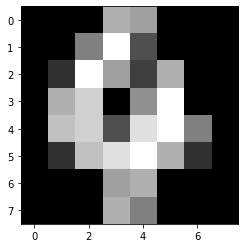

In [54]:
# Visualizziamo un numero a caso (analogamente a quanto fatto per l'esercizio sulle eigenfaces).

i_rand = np.random.choice(digits_dataset['data'].shape[0], 1, replace=False)

plt.figure(figsize=(4,4))
plt.imshow(digits_dataset['images'][int(i_rand)], cmap=plt.cm.gray)

## MDA e PCA a Confronto.

Effettuiamo una riduzione di dimensionalità del dataset sia rispetto la MDA che la PCA. Visualizziamo poi i risultati per notare le differenze.

**Esercizio 1:** Studia la classe MultipleFisherDiscriminantAnalysis nel modulo FisherDA.py e completa il codice del metodo "transform".

**Esercizio 2:** Completa il codice nelle celle seguenti.

In [4]:
# Inizializzazione degli oggetti MultipleFisherDiscriminantAnalysis
mda_3dim = MDA(n_dimensions=3)  # Per la proiezione su 3 dimensioni
mda_2dim = MDA(n_dimensions=2)  # Per la proiezione su 2 dimensioni

# Inizializzazione degli oggetti PrincipalComponentAnalysis
pca_3dim = PCA(n_components=3)  # Per la proiezione su 3 dimensioni
pca_2dim = PCA(n_components=2)  # Per la proiezione su 2 dimensioni

In [5]:
# Preparazione dataset per i metodi "fit" di mda_1dim, mda_2dim, pca_1dim, pca_2dim.
X = digits_dataset['data'].values
y = digits_dataset['target'].values

# "Fit" degli oggetti sopra inizializzati
mda_3dim.fit(X, y)
mda_2dim.fit(X, y)

pca_3dim.fit(X)
pca_2dim.fit(X)

PCA(n_components=2)

In [6]:
# Trasformazione del dataset X rispetto alle proiezioni eseguite da mda_1dim, mda_2dim, pca_1dim, pca_2dim.
# ATTENZIONE! usare StandardScaler per PCA!

Z3m = mda_3dim.transform(X)  # Trasformazione rispetto mda_3dim
Z2m = mda_2dim.transform(X)  # Trasformazione rispetto mda_2dim

Z3p = pca_3dim.transform(X)  # Trasformazione rispetto pca_3dim
Z2p = pca_2dim.transform(X)  # Trasformazione rispetto pca_2dim

/Users/edovay/Documents/code/Python/MIA/.MIA/lib/python3.7/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'PCA')

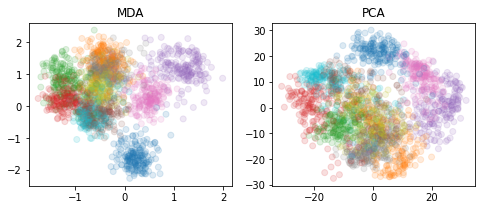

In [7]:
# Plot a confronto

class_colors = [plt.cm.tab10.colors[c] for c in y]

# Plot per proiezione in R^2
fig2, axs2 = plt.subplots(1, 2, figsize=(8, 3))
axs2[0].scatter(Z2m[:, 0], Z2m[:, 1], c=class_colors, alpha=0.15)
axs2[0].set_title('MDA')
axs2[1].scatter(Z2p[:, 0], Z2p[:, 1], c=class_colors, alpha=0.15)
axs2[1].set_title('PCA')

/Users/edovay/Documents/code/Python/MIA/.MIA/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.92, 'PCA')

/Users/edovay/Documents/code/Python/MIA/.MIA/lib/python3.7/site-packages/matplotlib/colors.py:292: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


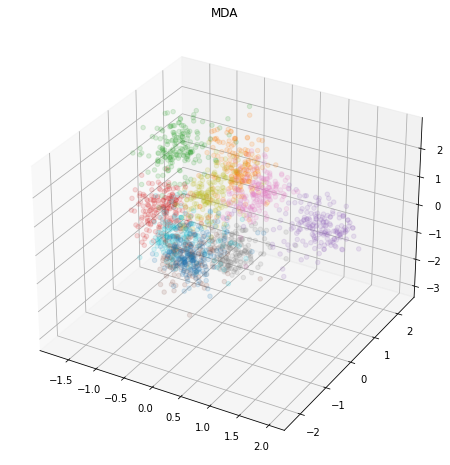

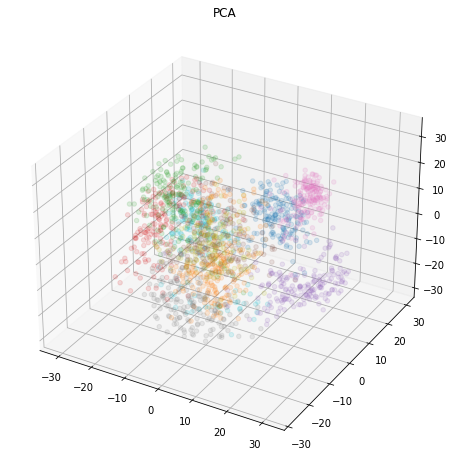

In [8]:
# Plot a confronto

# Plot per proiezione in R^3

fig_Z3m = plt.figure(figsize=(10, 8))
ax_Z3m = fig_Z3m.add_subplot(111, projection='3d')
ax_Z3m.scatter(Z3m[:, 0], Z3m[:, 1], Z3m[:, 2], c=class_colors, alpha=0.15)
plt.title('MDA')

fig_Z3p = plt.figure(figsize=(10, 8))
ax_Z3p = fig_Z3p.add_subplot(111, projection='3d')
ax_Z3p.scatter(Z3p[:, 0], Z3p[:, 1], Z3p[:, 2], c=class_colors, alpha=0.15)
plt.title('PCA')
